In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("SaccharomycesCerevisiaeS288C_binary_hq.txt",nrows=200,sep="\t",usecols=["Gene_A","Gene_B"])

In [3]:
df

,Gene_A,Gene_B
0,A0A023PYF7,RVS167
1,YSP2,YSP2
2,LAM4,LAM4
3,A2P2R3,CDC25
4,A2P2R3,HSE1
...,...,...
195,QCR7,SEC72
196,QCR7,DUO1
197,COB,CYT1
198,COB,COR1


In [5]:
G=nx.from_pandas_edgelist(df,"Gene_A","Gene_B",create_using=nx.DiGraph())


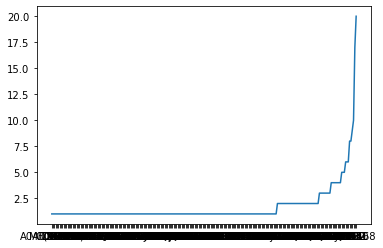

In [6]:
degrees=dict(G.degree())
order=sorted(degrees.items(),key=lambda t:t[1])
x,y=zip(*order)
plt.plot(x,y)
plt.show()

<BarContainer object of 20 artists>

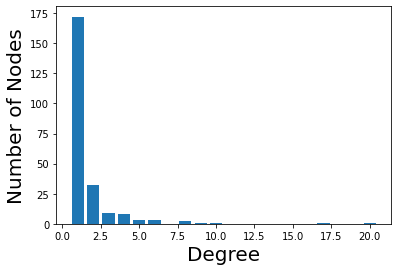

In [7]:
from collections import Counter
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Number of Nodes", fontsize=20)
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)

In [8]:
degree_counts


Counter({1: 172,
         2: 32,
         10: 1,
         4: 8,
         17: 1,
         5: 3,
         3: 9,
         9: 1,
         8: 2,
         6: 3,
         20: 1})

In [9]:
import math
def plot_degree_dist(G):
    
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
   
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
    print((P_k))
    print(sum(P_k))
    plt.figure()
    plt.bar(values, P_k)
    plt.xlabel("k",fontsize=20)
    plt.ylabel("p(k)", fontsize=20)
    plt.title("Degree Distribution", fontsize=20)
    
    plt.show()

[0.7381974248927039, 0.13733905579399142, 0.03862660944206009, 0.034334763948497854, 0.012875536480686695, 0.012875536480686695, 0.008583690987124463, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232]
1.0


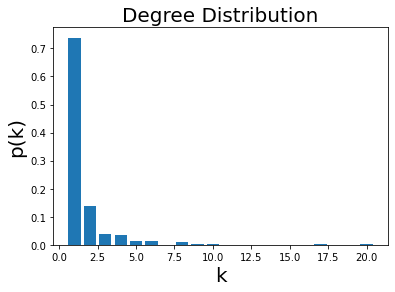

In [10]:
plot_degree_dist(G)

In [11]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) 
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= arange(0,maxk+1) 
    Pk = np.zeros(maxk+1) 
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) 
    return kvalues,Pk

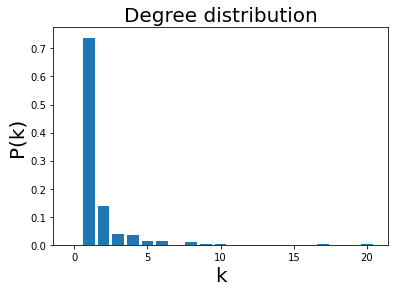

In [12]:
from numpy  import *
import numpy as np
ks, Pk = degree_distribution(G)
plt.figure()
plt.bar(ks,Pk)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.show(True)